In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPooling2D
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
x_train=[]
y_train=[]
image_size=150
labels=["MildDemented","ModerateDemented","NonDemented","VeryMildDemented"]
for i in labels:
    folderpath=os.path.join('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test',i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderpath=os.path.join('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train',i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)
        
x_train=np.array(x_train)
y_train=np.array(y_train)

In [5]:
x_train,y_train=shuffle(x_train,y_train,random_state=201)
x_train.shape


(6400, 150, 150, 3)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5120, 150, 150, 3)
(1280, 150, 150, 3)
(5120,)
(1280,)


In [7]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)


In [8]:
y_train=np.array(y_train)
print(y_train.shape)
y_test=np.array(y_test)
print(y_test.shape)

(5120, 4)
(1280, 4)


In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:

# from tensorflow.keras.utils import Sequence

# class DataGenerator(Sequence):
#     def __init__(self, x_set, y_set, batch_size):
#         self.x, self.y = x_set, y_set
#         self.batch_size = batch_size
    
#     def __len__(self):
#         return int(np.ceil(len(self.x)/float(self.batch_size)))
    
#     def __getitem__(self, idx):
#         batch_x = self.x[idx*self.batch_size:(idx+1)*self.batch_size]
#         batch_y = self.y[idx*self.batch_size:(idx+1)*self.batch_size]
#         return batch_x, batch_y


# train= DataGenerator(x_train,y_train, 32)
# test = DataGenerator(x_test, y_test, 32)

In [13]:
history=model.fit(x_train,y_train,epochs=30,validation_split=0.1)
# history=model.fit(train, validation_data = test, epochs=30)

Epoch 1/30


2023-04-03 15:53:55.165434: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


144/144 [==============================] - 28s 93ms/step - loss: 1.4207 - accuracy: 0.4805 - val_loss: 1.1144 - val_accuracy: 0.4590
Epoch 2/30
144/144 [==============================] - 13s 91ms/step - loss: 1.0319 - accuracy: 0.4874 - val_loss: 0.9955 - val_accuracy: 0.4766
Epoch 3/30
144/144 [==============================] - 13s 91ms/step - loss: 1.0280 - accuracy: 0.4924 - val_loss: 0.9598 - val_accuracy: 0.5430
Epoch 4/30
144/144 [==============================] - 13s 92ms/step - loss: 1.0191 - accuracy: 0.4859 - val_loss: 0.9507 - val_accuracy: 0.4629
Epoch 5/30
144/144 [==============================] - 13s 92ms/step - loss: 0.9128 - accuracy: 0.5592 - val_loss: 0.9333 - val_accuracy: 0.5723
Epoch 6/30
144/144 [==============================] - 13s 93ms/step - loss: 0.8926 - accuracy: 0.5645 - val_loss: 0.8922 - val_accuracy: 0.5840
Epoch 7/30
144/144 [==============================] - 13s 94ms/step - loss: 0.8831 - accuracy: 0.5734 - val_loss: 0.8560 - val_accuracy: 0.5820
Epo

In [14]:
model.save('alzheimers.h5')

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

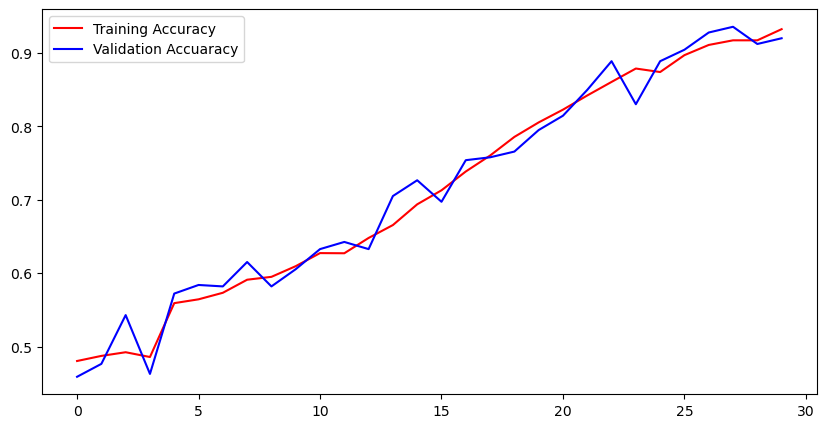

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuaracy")
plt.legend(loc='upper left')
plt.show()

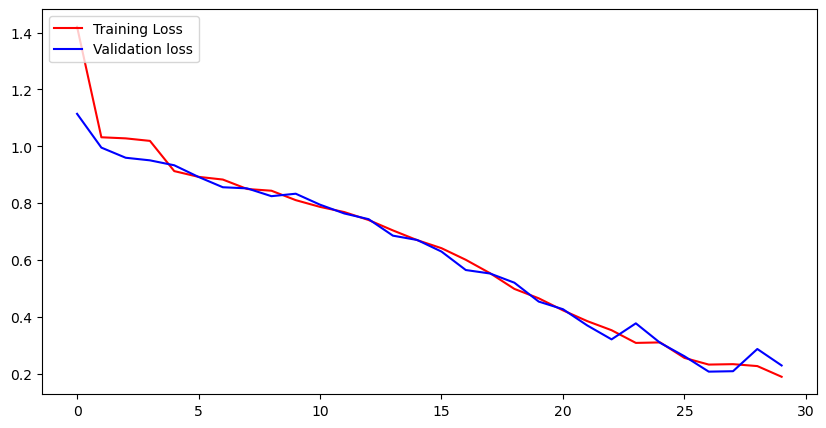

In [17]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

In [21]:
import cv2
# from matplotlib import pyplot as plt
# import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
import numpy as np
model = tf.keras.models.load_model('alzheimers.h5',compile=False)

In [22]:
img=cv2.imread(r'C:\Users\Amar Singh\Desktop\ffp\Upload\2.jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape

(150, 150, 3)

In [23]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

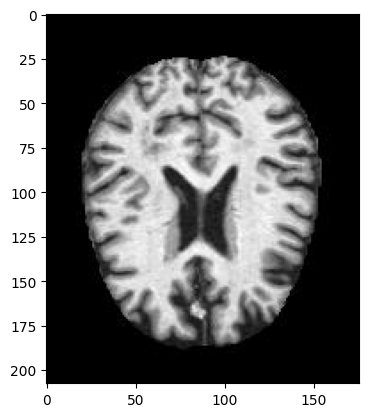

In [18]:
from tensorflow.keras.preprocessing import image
img=image.load_img(r'C:\Users\Amar Singh\Desktop\ffp\Upload\2.jpg')
plt.imshow(img)
plt.show()

In [24]:
a=model.predict(img_array)
indices=a.argmax()
if indices==0:
    print("Mild Demented")
elif indices==1:
    print("Moderate Demented")
elif indices==2:
    print("Non Demented")
else:
    print("Very Mild Demented")
# print(indices)

1/1 [==============================] - 0s 279ms/step
Very Mild Demented
